In [1]:
# loading...
import time
from astropy.table import Table, Column
import os
import matplotlib.pyplot as plt
import scipy.integrate as si
import astropy.io.fits as pyfits
import numpy as np
import random
import sys
sys.path.insert(0, '../Modules')
import erqLum 
from astropy.io import fits

In [2]:
# selection parameters
tab=Table.read('../Sampling/FullSample.fits')
z_dr12=tab['z_dr12']
row=len(tab)
m_AB = tab['ABw3']
fwhm=tab['fwhm_gf']
iw3=tab['i-w3']
rew=tab['rew_gf']
frat=tab['frat_nv/civ']
kt80 = tab['kurt80_gf']

In [3]:
#  Limiting the luminosity of the full sample with ERQs' lum range
Lum_all = erqLum.Lum(m_AB, z_dr12, 12.082e-4, 3.45e-4)
Lum_erq=Lum_all[(iw3>=4.6) & (rew>=100)]
Lum_matched = Lum_all[(Lum_all>=min(Lum_erq)) & (Lum_all<=max(Lum_erq))]
# print(min(Lum_erq), max(Lum_erq))
tab.add_column(Lum_all, name='Lum')
tab.write('../Sampling/FullSampleWithLum.fits', overwrite=True)
tab.remove_rows((Lum_all<min(Lum_erq)) | (Lum_all>max(Lum_erq)))
# print(len(tab),len(Lum_matched))

# tab.add_column(Lum_matched, name='Lum')
if os.path.exists('LumMatch.fits')==True:
    !rm LumMatch.fits
tab.write('LumMatch.fits')

In [9]:
print( np.median(iw3), np.median(iw3[(rew>=100)]), np.median(iw3[(rew>=100) & (kt80>0.3)]))

# plt.scatter(Lum_all, z_dr12, alpha=0.2, s=0.5)


2.4943086490000024 3.072217475999995 4.545984046000001


<Figure size 432x288 with 0 Axes>

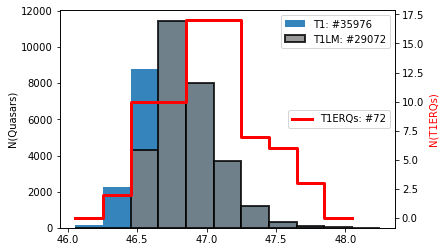

In [16]:
#  Ploting the different samples
bins = np.linspace(min(Lum_all), max(Lum_all), 12)
pop,bins,patch = plt.hist(Lum_erq, bins=bins)
plt.clf()
bin_cen = (bins[:-1] + bins[1:])*0.5
# print(pop)
# print(bin_cen)
# plt.step( bin_cen, pop, edgecolor='blue', facecolor='None', label='ERQs #%d' 
#          %len(Lum_erq))
fig, ax = plt.subplots()
#plt.hist(Lum_all, bins=bins, color='C2', label='F: #%d' %row, alpha=0.7)
ax.hist(Lum_all, bins=bins, color='C0', label='T1: #%d' %row, alpha=0.9)
# ax.legend()
ax.hist(Lum_matched, bins=bins, linestyle='-', linewidth=2, 
         edgecolor='black', facecolor='gray', label='T1LM: #%d' %len(tab), 
        alpha=0.8)
ax.legend(loc=1)
ax.set_ylabel('N(Quasars)')
ax2 = ax.twinx()
ax2.step(bins[:-1], pop, linewidth=3, label='T1ERQs: #%d' %len(Lum_erq), color='r')
ax2.legend(loc=7)
plt.xlabel(r'$log_{10}(\lambda L_{\lambda} \ \ (erg \ s^{-1}))$')
ax2.set_ylabel(r'N(T1ERQs)', color= 'red')
plt.savefig('Lum-sample.png', dpi=200, format='png')
plt.show()

[5.39052308 2.17477487]


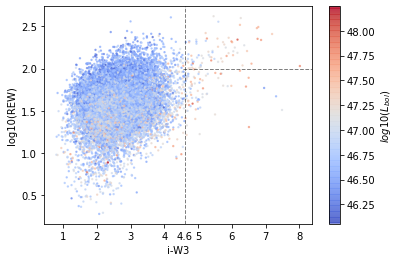

In [17]:
# plotting i-w3, rew space with L color map
# LMsample = Table.read('LumMatch.fits')
LMsample = Table.read('../Sampling/FullSample.fits')
LMiw3 = LMsample['i-w3']
LMrew = np.log10(LMsample['rew_gf'])
# LMlum = LMsample['Lum']
LMlum = Lum_all
p=plt.scatter(LMiw3, LMrew, s=2, alpha=0.6,c=LMlum,  label='L.M.', cmap='coolwarm')
plt.colorbar(p, label=r'$log10(L_{bol})$')
# cbar.set_label()
plt.axvline(x=4.6, ymin=0, ls='--', c='black', alpha=0.5, lw=1)
plt.axhline(y=2, xmin=0.52, ls='--', c='black', alpha=0.5, lw=1)
# plt.scatter(np.median(X[:,0]), np.median(X[:,1]),  c='black')
# plt.scatter(np.median(ERQ[:,0]), np.median(ERQ[:,1]),  c='black')
X = np.array(list(zip(LMiw3,LMrew)))
MainCenter = np.median(X, axis=0)
T1CERQ = X[(LMiw3>=4.6) & (LMrew>=2)]
T1CERQ_Center = np.median(T1CERQ, axis=0)
# C_cerq = 
print(T1CERQ_Center)
# CERQ_Center[0]+0.1,T1CERQ_Center[1]),fontsize=10)
plt.text(4.35, -.022, '4.6')
# plt.scatter(ERQ[:,0], ERQ[:,1], s=2, c='blue, label='CERQ')
plt.xlabel('i-W3')
plt.ylabel('log10(REW)')
# plt.legend()
plt.savefig('L_cmap_noMatch.', 
            bbox_inches='tight', format='png', dpi=200)


[5.39052308 2.17477487]


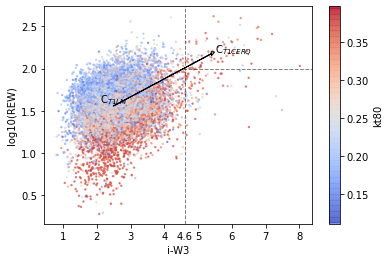

In [18]:
# plotting i-w3, rew space with kt80 color map
LMsample = Table.read('LumMatch.fits')
LMiw3 = LMsample['i-w3']
LMrew = np.log10(LMsample['rew_gf'])
LMlum = LMsample['Lum']
LMkt80 = LMsample['kurt80_gf']
p=plt.scatter(LMiw3, LMrew, s=2, alpha=0.6,c=LMkt80,  label='L.M.', cmap='coolwarm')
plt.colorbar(p, label='kt80')
# cbar.set_label()
plt.axvline(x=4.6, ymin=0, ls='--', c='black', alpha=0.5, lw=1)
plt.axhline(y=2, xmin=0.52, ls='--', c='black', alpha=0.5, lw=1)
# plt.scatter(np.median(X[:,0]), np.median(X[:,1]),  c='black')
# plt.scatter(np.median(ERQ[:,0]), np.median(ERQ[:,1]),  c='black')
X = np.array(list(zip(LMiw3,LMrew)))
MainCenter = np.median(X, axis=0)
T1CERQ = X[(LMiw3>=4.6) & (LMrew>=2)]
T1CERQ_Center = np.median(T1CERQ, axis=0)
# C_cerq = 
print(T1CERQ_Center)
# print(M)
plt.arrow(MainCenter[0],MainCenter[1], T1CERQ_Center[0]-MainCenter[0],
          T1CERQ_Center[1] -MainCenter[1] ,  head_width=0.05, head_length=0.1, 
          fc='lightblue', ec='black')
plt.annotate('C$_{T1LM}$', (MainCenter[0]-0.4,MainCenter[1]+0.05),fontsize=10)
plt.annotate('C$_{T1CERQ}$', (T1CERQ_Center[0]+0.1,T1CERQ_Center[1]),fontsize=10)
plt.text(4.35, -.022, '4.6')
# plt.scatter(ERQ[:,0], ERQ[:,1], s=2, c='blue')
plt.xlabel('i-W3')
plt.ylabel('log10(REW)')
# plt.legend()
plt.savefig('kt80_cmap.png', 
            bbox_inches='tight', format='png', dpi=200)


In [19]:
LMkt80 = LMsample['kurt80_gf']
y=[
np.median(LMiw3[(LMiw3>4.6) & (LMrew>=2)]),
10**(np.median(LMrew[(LMiw3>4.6) & (LMrew>=2)])),
np.median(LMkt80[(LMiw3>4.6) & (LMrew>=2)])]

In [25]:
x=[np.median(LMiw3),10**(np.median(LMrew)),np.median(LMkt80)]

In [28]:
np.array(y)-np.array(x)

array([2.90306164e+00, 1.13639547e+02, 1.10448214e-01])

In [29]:
x

[2.4874614380000004, 35.906477866412715, 0.24697292313520416]

In [30]:
y

[5.390523080499998, 149.54602517148925, 0.35742113749709137]